## Time Series Analysis : Case study 


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline 

In [2]:
data1=pd.read_csv("CS5-train.csv",index_col='date',parse_dates=True)
data1.head(5)
len(data1)

3000888

### 1. Filtered out the desired store number 49 and Family Bread/Bakery 

In [5]:
# Define the store and product that we want to filter by
store_number = 49  
product_family = 'BREAD/BAKERY'  # Replace with your specific product

# Filter the DataFrame for the specific store and product
df = data1[(data1['store_nbr'] == 49) & (data1['family'] == product_family)]
df

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,1424,49,BREAD/BAKERY,0.000,0
2013-01-02,3206,49,BREAD/BAKERY,818.057,0
2013-01-03,4988,49,BREAD/BAKERY,477.806,0
2013-01-04,6770,49,BREAD/BAKERY,504.232,0
2013-01-05,8552,49,BREAD/BAKERY,631.121,0
...,...,...,...,...,...
2017-08-11,2993402,49,BREAD/BAKERY,1323.130,10
2017-08-12,2995184,49,BREAD/BAKERY,1131.045,11
2017-08-13,2996966,49,BREAD/BAKERY,1189.882,10


In [7]:
df['sales'].describe()

count    1684.000000
mean     1027.703200
std       387.527111
min         0.000000
25%       703.518000
50%      1055.543500
75%      1305.199500
max      2177.901000
Name: sales, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1684 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1684 non-null   int64  
 1   store_nbr    1684 non-null   int64  
 2   family       1684 non-null   object 
 3   sales        1684 non-null   float64
 4   onpromotion  1684 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 78.9+ KB


### 2. Visualize the data

<Axes: >

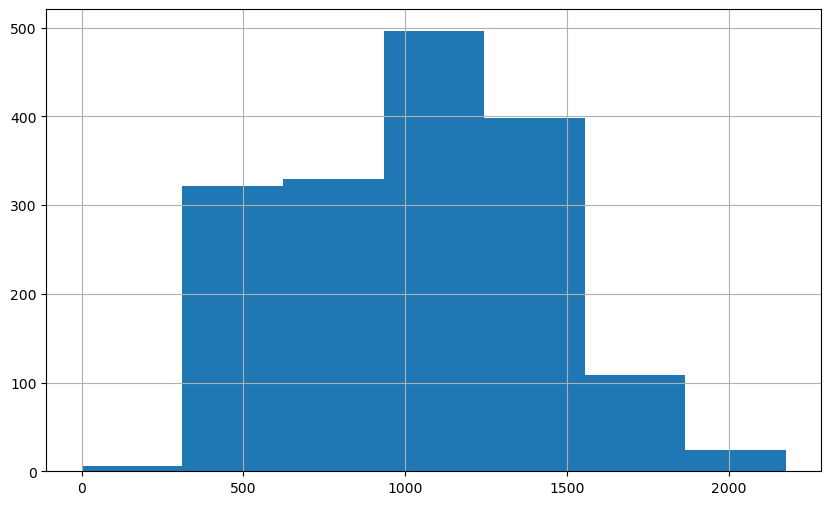

In [10]:
df['sales'].hist(bins=7, figsize=(10,6))

### 2. Visualize the timeseries plot

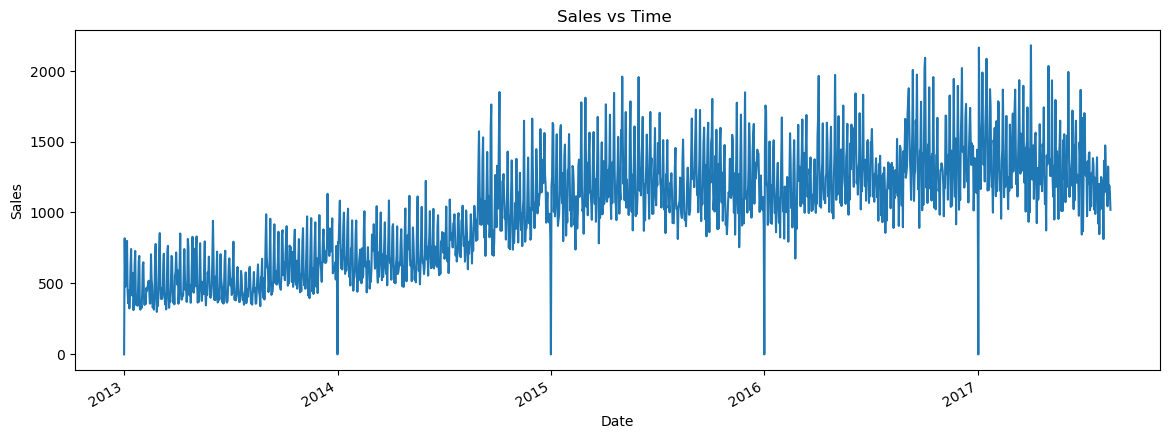

In [12]:
df['sales'].plot(figsize=(14,5) ,xlabel="Date", ylabel="Sales", title="Sales vs Time ");


### Its very hard to take insights from this plot . So lets do the ETS breakdown as 
#### 1)Observed 
#### 2)Residual
#### 3)Trend
#### 4) Seasonal

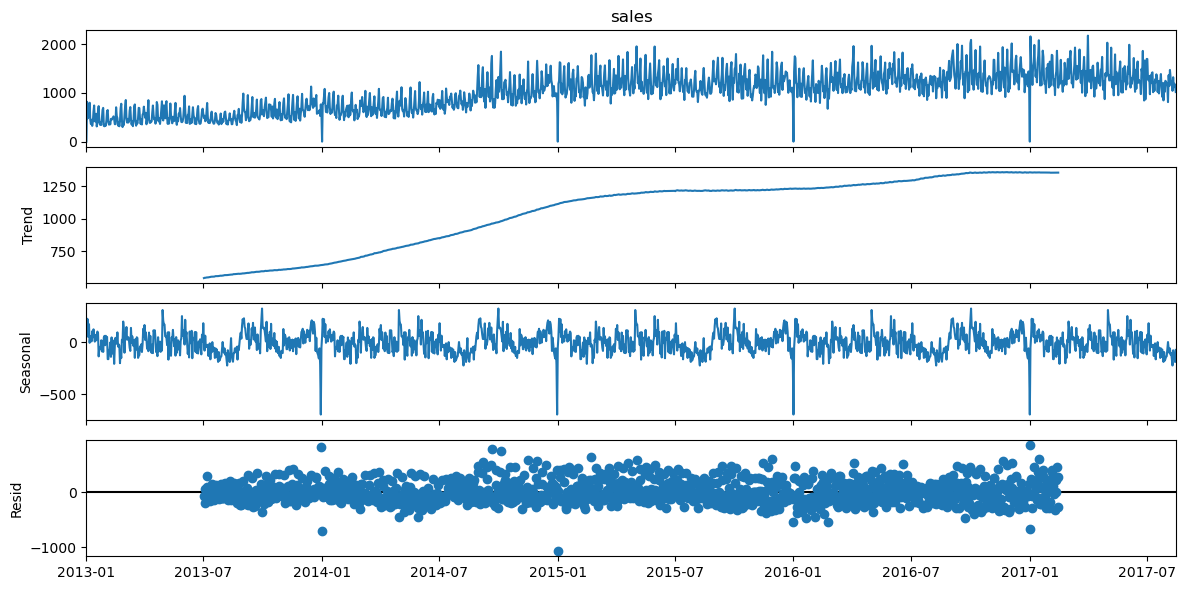

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose # this line imports the seasonal_decompose class from the statsmodels.tsa.seasonal library

result = seasonal_decompose(df['sales'], model='additive', period=365) # the given dataset consists of daily datas , so period=365 means yearly
#result = seasonal_decompose(demand_data, model='multiplicative')

from pylab import rcParams # these two lines adjust the size of the decomposed plots
rcParams['figure.figsize'] = 12, 6

result.plot(); # this generates the plot of result


### 3. Lets resample our data in monthly basis 

In [16]:
df1 = df.copy()
df1.head(5)


,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,1424,49,BREAD/BAKERY,0.000,0
2013-01-02,3206,49,BREAD/BAKERY,818.057,0
2013-01-03,4988,49,BREAD/BAKERY,477.806,0
2013-01-04,6770,49,BREAD/BAKERY,504.232,0
2013-01-05,8552,49,BREAD/BAKERY,631.121,0


In [17]:
# Resample monthly and aggregate
df_monthly = df1.resample('ME').agg({
    'sales': 'mean',  # Average sales
})

In [18]:
type(df_monthly)

pandas.core.frame.DataFrame

In [19]:
df_monthly.head()

,sales
date,
2013-01-31,473.742161
2013-02-28,461.543714
2013-03-31,516.614033
2013-04-30,526.932167
2013-05-31,523.671162


### Visualize the timeseries plot on monthly basis from begining of 2013 to the end of the dataset

<Axes: xlabel='date'>

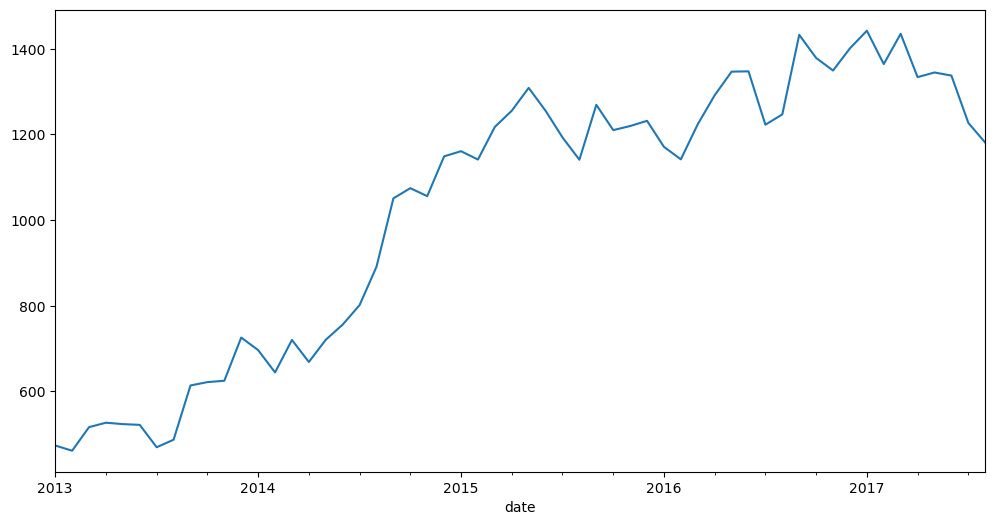

In [21]:
df_monthly['sales'].plot()

In [22]:
# Resample monthly and aggregate
df_yearly = df1.resample('YE').agg({
    'sales': 'mean',  # Average sales
})

### Visualize the timeseries plot on yearly basis from begining of 2013 to the end of the dataset so that it would be even more clear

<Axes: xlabel='date'>

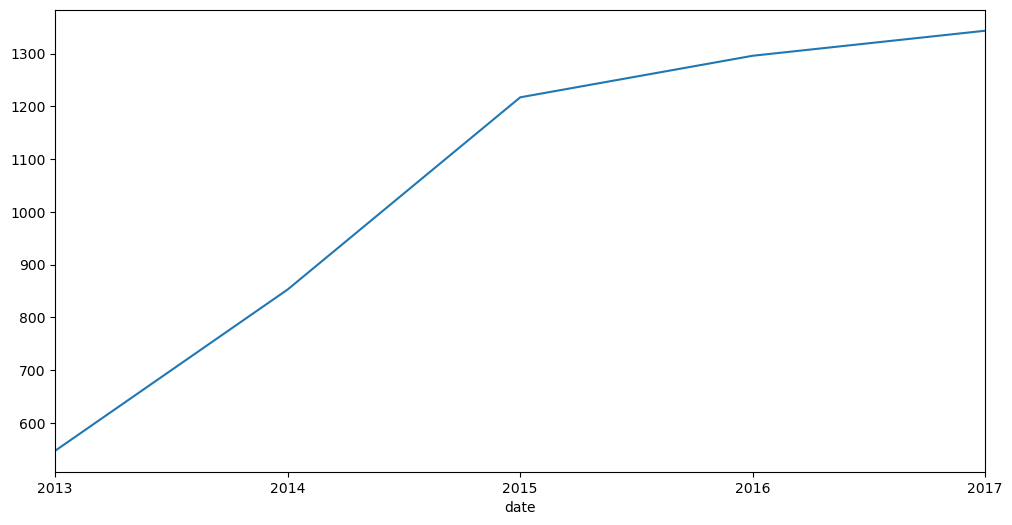

In [24]:
df_yearly['sales'].plot()

### ETS Decomposition of newdata set that is resampled on monthly basis to see the seasonal decomposition on Yearly basis 

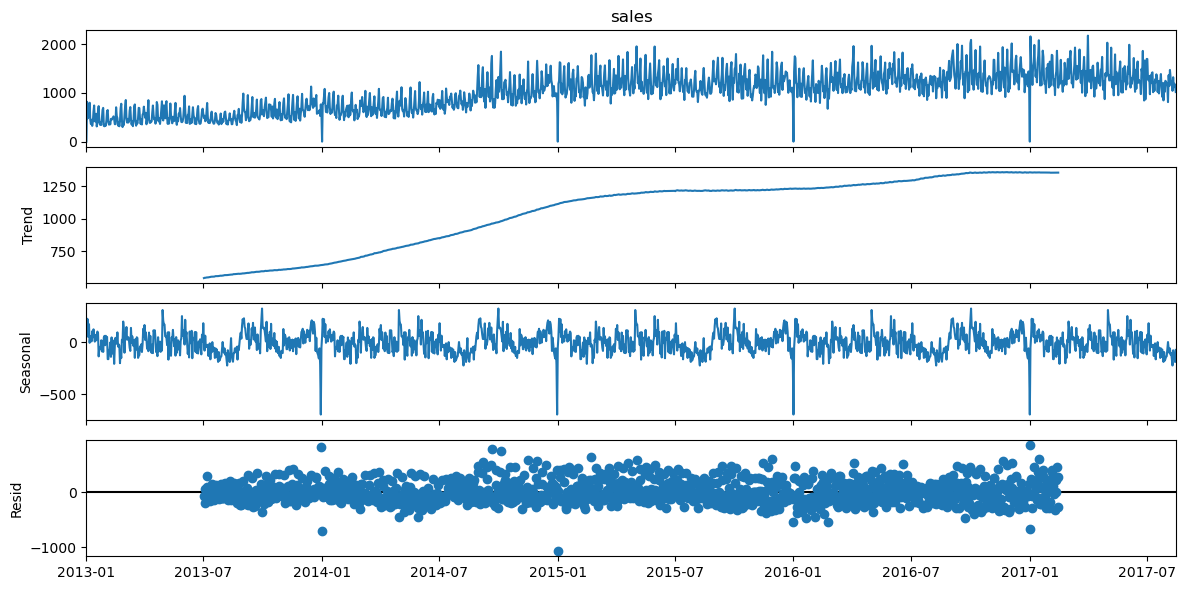

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose # this line imports the seasonal_decompose class from the statsmodels.tsa.seasonal library

result1 = seasonal_decompose(df_monthly['sales'], model='multiplicative', period=12)
#result = seasonal_decompose(demand_data, model='multiplicative')

from pylab import rcParams # these two lines adjust the size of the decomposed plots
rcParams['figure.figsize'] = 12, 6

result.plot(); # this generates the plot of result


### 5 .Applying MA on the past data 
#### Adopting Rolling Method used in pandas .
#### We have a new data that is resampled on monthly basis to make our calculation easier.
#### Lets breakdown into window size of 3 , 5 , 10 and 12 and make a comparisons .


In [28]:
df_monthly1=df_monthly.copy()
df_monthly1.head()

,sales
date,
2013-01-31,473.742161
2013-02-28,461.543714
2013-03-31,516.614033
2013-04-30,526.932167
2013-05-31,523.671162


In [29]:
df_monthly1['SMA2'] = df_monthly['sales'].rolling(window=2).mean().shift()
df_monthly1['SMA5'] = df_monthly['sales'].rolling(window=5).mean().shift()
df_monthly1['SMA10'] = df_monthly['sales'].rolling(window=10).mean().shift()
df_monthly1['SMA8'] = df_monthly['sales'].rolling(window=8).mean().shift()

In [30]:
#Check the top 50 datas from our dataset 
df_monthly1.head(50)

,sales,SMA2,SMA5,SMA10,SMA8
date,,,,,
2013-01-31,473.742161,NaN,NaN,NaN,NaN
2013-02-28,461.543714,NaN,NaN,NaN,NaN
2013-03-31,516.614033,467.642937,NaN,NaN,NaN
2013-04-30,526.932167,489.078873,NaN,NaN,NaN
2013-05-31,523.671162,521.773100,NaN,NaN,NaN
2013-06-30,521.888766,525.301664,500.500647,NaN,NaN
2013-07-31,469.657387,522.779964,510.129968,NaN,NaN
2013-08-31,487.266808,495.773076,511.752703,NaN,NaN
2013-09-30,613.901333,478.462098,505.883258,NaN,497.664525


In [31]:
df_monthly1.tail(50)

,sales,SMA2,SMA5,SMA10,SMA8
date,,,,,
2013-07-31,469.657387,522.779964,510.129968,NaN,NaN
2013-08-31,487.266808,495.773076,511.752703,NaN,NaN
2013-09-30,613.901333,478.462098,505.883258,NaN,497.664525
2013-10-31,621.705614,550.584071,523.277091,NaN,515.184421
2013-11-30,624.884267,617.803473,542.883982,521.692314,535.204659
2013-12-31,725.735832,623.294940,563.483082,536.806525,548.738438
2014-01-31,696.415840,675.310049,614.698771,563.225737,573.588896
2014-02-28,644.370572,711.075836,656.528577,581.205918,595.181981
2014-03-31,720.140870,670.393206,662.622425,592.949758,610.492207


#### 5. Visualization after SWMA for different window sizes in resampled monthly data 

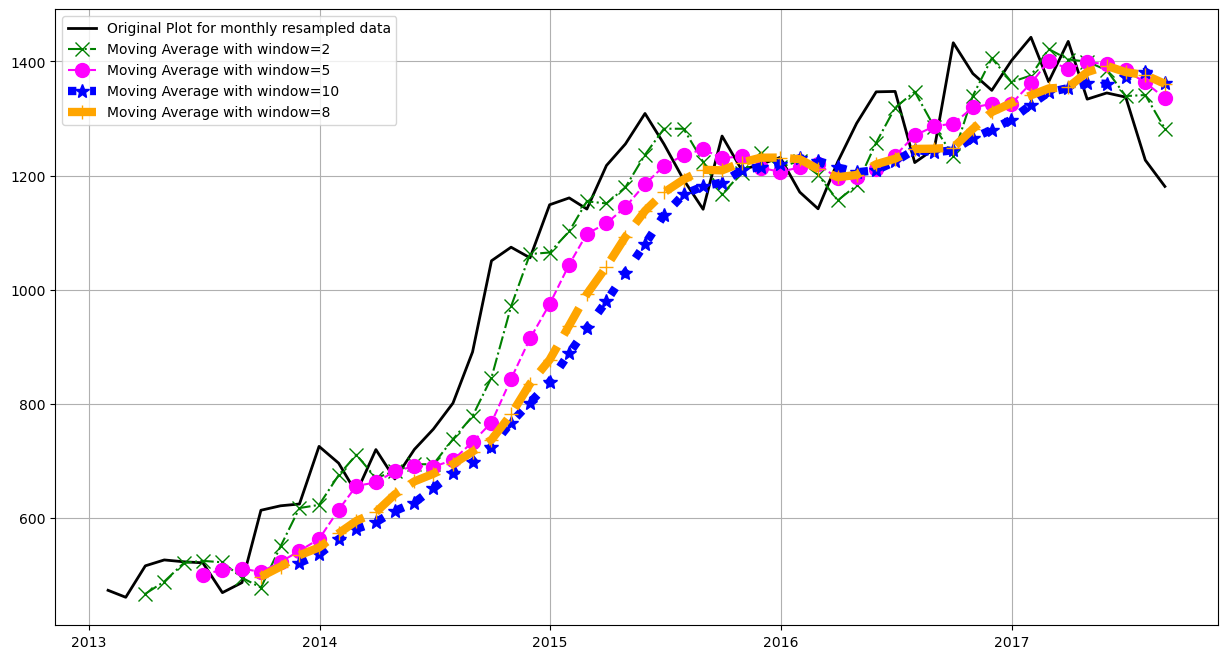

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.grid(True)

plt.plot(df_monthly1['sales'],label='Original Plot for monthly resampled data', color='black',linewidth=2)
plt.plot(df_monthly1['SMA2'],label='Moving Average with window=2',marker='x', markersize=10, linestyle='dashdot', color='green')
plt.plot(df_monthly1['SMA5'],label='Moving Average with window=5',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.plot(df_monthly1['SMA10'],label='Moving Average with window=10',marker='*', markersize=10, linestyle='dotted', color='blue',linewidth=6)
plt.plot(df_monthly1['SMA8'],label='Moving Average with window=8',marker='+', markersize=10, linestyle='dashed', color='orange',linewidth=6)

plt.legend(loc=2)
plt.show()

## Conclusion from above plot :

#### The smaller the window size (like 2-month), the more closely the line follows the original data's fluctuations

#### The larger the window size (like 8,10-month), the smoother the line becomes, showing long-term trends while filtering out short-term fluctuations

#### All moving averages show an overall upward trend from 2013 to 2017

## We can see Moving Average model is not working perfectly in seasonal data . So, its necessary to deseasonalize our data .


In [35]:
len(df_monthly1)

56

In [36]:
df_monthly1.index

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31'],
     

## Lets Split our data into training and test datasets

In [38]:
train_data=df_monthly[0 : 48]
test_data=df_monthly[49 :]

In [39]:
train_data

,sales
date,
2013-01-31,473.742161
2013-02-28,461.543714
2013-03-31,516.614033
2013-04-30,526.932167
2013-05-31,523.671162
2013-06-30,521.888766
2013-07-31,469.657387
2013-08-31,487.266808
2013-09-30,613.901333


In [40]:
test_data

,sales
date,
2017-02-28,1364.218936
2017-03-31,1434.864261
2017-04-30,1333.692967
2017-05-31,1344.572065
2017-06-30,1337.308537
2017-07-31,1226.952195
2017-08-31,1180.900527


In [41]:
len(train_data)

48

In [42]:
len(test_data)

7

In [43]:
import warnings

# Suppress the specific warning
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

In [44]:
sales_2013 = df_monthly1.iloc[0:12]
sales_2013.rename(columns={"sales": "Year 2013"}, inplace=True)
sales_2013= sales_2013.reset_index(drop=True)

sales_2014 = df_monthly1.iloc[12:24]
sales_2014.rename(columns={"sales": "Year 2014"}, inplace=True)
sales_2014= sales_2014.reset_index(drop=True)

sales_2015 = df_monthly1.iloc[24:36]
sales_2015.rename(columns={"sales": "Year 2015"}, inplace=True)
sales_2015= sales_2015.reset_index(drop=True)

sales_2016 = df_monthly1.iloc[36:48]
sales_2016.rename(columns={"sales": "Year 2016"}, inplace=True)
sales_2016= sales_2016.reset_index(drop=True)







In [45]:
# Creating a DataFrame for months
months = {"Month": ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']}
months_df = pd.DataFrame(data=months)

# Concatenating all sales data with month DataFrame
sales_table = pd.concat(
    [months_df, sales_2013["Year 2013"], sales_2014["Year 2014"], sales_2015["Year 2015"], sales_2016["Year 2016"]],
    axis=1
)

# Setting the 'Month' column as the index
sales_table.set_index("Month", inplace=True)

In [46]:
sales_table

,Year 2013,Year 2014,Year 2015,Year 2016
Month,,,,
Jan,473.742161,696.415840,1160.791966,1170.946194
Feb,461.543714,644.370572,1141.286786,1141.776690
Mar,516.614033,720.140870,1217.564290,1223.767774
Apr,526.932167,668.680167,1255.264303,1291.380533
May,523.671162,720.524741,1308.617871,1346.524648
Jun,521.888766,756.013632,1255.161933,1347.218103
Jul,469.657387,801.477355,1192.923903,1222.665100
Aug,487.266808,891.055065,1140.891519,1246.676806
Sep,613.901333,1050.727403,1269.126267,1432.468700


### Applying Formula to calculate the seasonal Index

In [48]:
sales_table["average"] = sales_table.mean(axis = 1)
average_all = train_data["sales"][0:].mean()
sales_table["S Index"] = sales_table["average"]/average_all
sales_table

,Year 2013,Year 2014,Year 2015,Year 2016,average,S Index
Month,,,,,,
Jan,473.742161,696.415840,1160.791966,1170.946194,875.474040,0.895035
Feb,461.543714,644.370572,1141.286786,1141.776690,847.244440,0.866175
Mar,516.614033,720.140870,1217.564290,1223.767774,919.521742,0.940067
Apr,526.932167,668.680167,1255.264303,1291.380533,935.564293,0.956468
May,523.671162,720.524741,1308.617871,1346.524648,974.834606,0.996616
Jun,521.888766,756.013632,1255.161933,1347.218103,970.070609,0.991745
Jul,469.657387,801.477355,1192.923903,1222.665100,921.680936,0.942274
Aug,487.266808,891.055065,1140.891519,1246.676806,941.472550,0.962508
Sep,613.901333,1050.727403,1269.126267,1432.468700,1091.555926,1.115945


In [49]:
sales_table["deseason 2013"] = sales_table["Year 2013"]/sales_table["S Index"]
sales_table["deseason 2014"] = sales_table["Year 2014"]/sales_table["S Index"]
sales_table["deseason 2015"] = sales_table["Year 2015"]/sales_table["S Index"]
sales_table["deseason 2016"] = sales_table["Year 2016"]/sales_table["S Index"]
sales_table

,Year 2013,Year 2014,Year 2015,Year 2016,average,S Index,deseason 2013,deseason 2014,deseason 2015,deseason 2016
Month,,,,,,,,,,
Jan,473.742161,696.415840,1160.791966,1170.946194,875.474040,0.895035,529.300063,778.087700,1296.923331,1308.268391
Feb,461.543714,644.370572,1141.286786,1141.776690,847.244440,0.866175,532.852852,743.926711,1317.617163,1318.182758
Mar,516.614033,720.140870,1217.564290,1223.767774,919.521742,0.940067,549.550210,766.052684,1295.188805,1301.787785
Apr,526.932167,668.680167,1255.264303,1291.380533,935.564293,0.956468,550.914566,699.113980,1312.395471,1350.155468
May,523.671162,720.524741,1308.617871,1346.524648,974.834606,0.996616,525.449403,722.971441,1313.061571,1351.097069
Jun,521.888766,756.013632,1255.161933,1347.218103,970.070609,0.991745,526.232642,762.306218,1265.609118,1358.431506
Jul,469.657387,801.477355,1192.923903,1222.665100,921.680936,0.942274,498.429496,850.577389,1266.004700,1297.567900
Aug,487.266808,891.055065,1140.891519,1246.676806,941.472550,0.962508,506.246867,925.763521,1185.331626,1295.237471
Sep,613.901333,1050.727403,1269.126267,1432.468700,1091.555926,1.115945,550.117888,941.558372,1137.265915,1283.637310


### Feeding the data to MA method

After the demand is deseasonalized, we can then apply the MA method. 

Let's first create a dataframe indexed based on the dates.

### Decomposing the data into train and test

To decide which window size is the best choice, we decompose the data into train and test. For this purpose, we want to use the historical data of the past three years to **train** the MA method and tune the window size. After we find the best choice, we **test (validate)** the MA method on the data of 2017. This approach often is used by data scientists to defend their approach.

In [51]:
# Original sales data
train_sales_data = df_monthly.iloc[0:48].copy()  # Make sure this contains enough rows
train_sales_data


,sales
date,
2013-01-31,473.742161
2013-02-28,461.543714
2013-03-31,516.614033
2013-04-30,526.932167
2013-05-31,523.671162
2013-06-30,521.888766
2013-07-31,469.657387
2013-08-31,487.266808
2013-09-30,613.901333


In [52]:
# Rename the sales column
#This train_sales_data have deaseasoned sales
train_sales_data.rename(columns={"sales": "deseason_sales"}, inplace=True)

# Assign deseasoned values for each year
train_sales_data["deseason_sales"][0:12] = sales_table["deseason 2013"].values
train_sales_data["deseason_sales"][12:24] = sales_table["deseason 2014"].values
train_sales_data["deseason_sales"][24:36] = sales_table["deseason 2015"].values
train_sales_data["deseason_sales"][36:] = sales_table["deseason 2016"].values

train_sales_data


C:\Users\Binod Pandey\AppData\Local\Temp\ipykernel_8540\2163196550.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_sales_data["deseason_sales"][0:12] = sales_table["deseason 2013"].values


,deseason_sales
date,
2013-01-31,529.300063
2013-02-28,532.852852
2013-03-31,549.550210
2013-04-30,550.914566
2013-05-31,525.449403
2013-06-30,526.232642
2013-07-31,498.429496
2013-08-31,506.246867
2013-09-30,550.117888


# Train the MA model

Here we implement the MA method on the train data (Jan 2013 to Dec 2016) to find the best window size. We consider 4 choices, but it can be extended to more options. 

Note that we need to use the **deseasonalized data** to implement MA method.

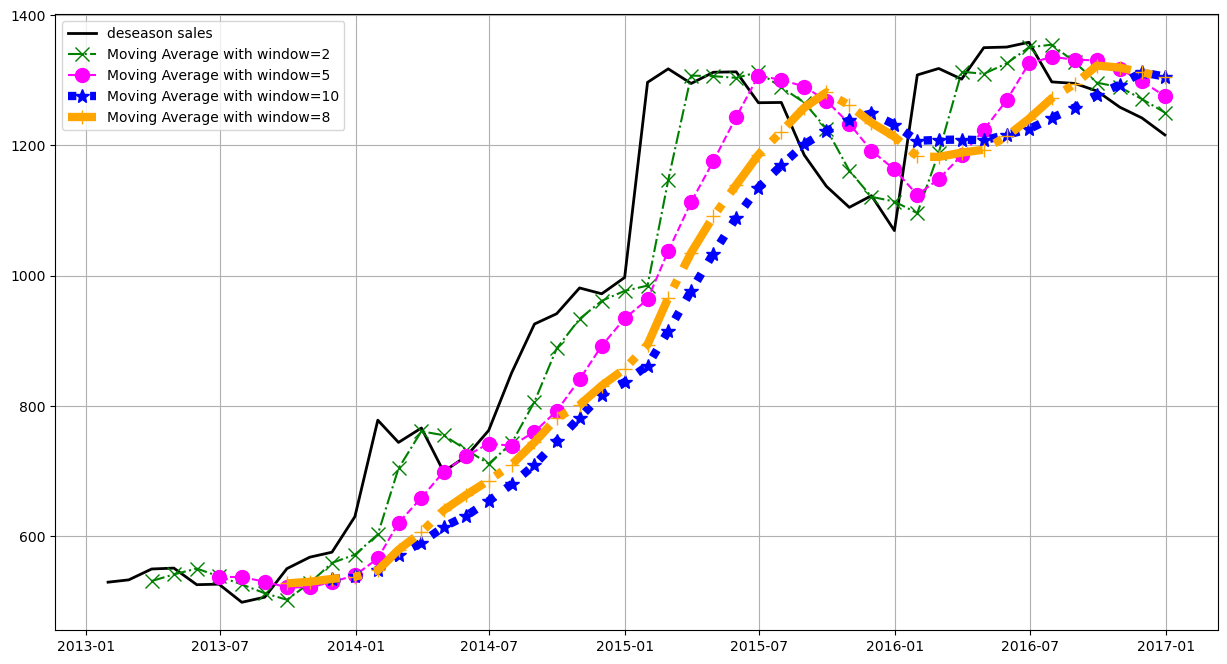

In [54]:
train_sales_data_MA = train_sales_data.copy()
train_sales_data_MA['MA2'] = train_sales_data.deseason_sales.rolling(2).mean().shift()
train_sales_data_MA['MA5'] = train_sales_data.deseason_sales.rolling(5).mean().shift()
train_sales_data_MA['MA10'] = train_sales_data.deseason_sales.rolling(10).mean().shift()
train_sales_data_MA['MA8'] = train_sales_data.deseason_sales.rolling(8).mean().shift()

plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(train_sales_data_MA['deseason_sales'],label='deseason sales', color='black',linewidth=2)
plt.plot(train_sales_data_MA['MA2'],label='Moving Average with window=2',marker='x', markersize=10, linestyle='dashdot', color='green')
plt.plot(train_sales_data_MA['MA5'],label='Moving Average with window=5',marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.plot(train_sales_data_MA['MA10'],label='Moving Average with window=10',marker='*', markersize=10, linestyle='dotted', color='blue',linewidth=6)
plt.plot(train_sales_data_MA['MA8'],label='Moving Average with window=8',marker='+', markersize=10, linestyle='dashdot', color='orange',linewidth=6)
plt.legend(loc=2)
plt.show()

## A performance metric for training and testing

How to compare the four different implementations and choose the best window size? We need a merit (score). 

Here we use the mad score!

### MAD (mean absolute deviation)

$$\textbf{MAD} = \dfrac{\text{sum of absolute deviaitons between demand and forecasted demand}}{\text{number of observations}}$$

In [56]:
pred = train_sales_data_MA.iloc[12:]
pred

,deseason_sales,MA2,MA5,MA10,MA8
date,,,,,
2014-01-31,778.087700,602.673935,565.884999,548.000131,547.442067
2014-02-28,743.926711,704.040397,620.253165,570.853880,579.021854
2014-03-31,766.052684,761.007206,659.014930,590.155095,606.233613
2014-04-30,699.113980,754.989698,698.682993,614.215423,639.686511
2014-05-31,722.971441,732.583332,723.434834,631.503556,663.794900
2014-06-30,762.306218,711.042710,742.030503,653.957751,685.401594
2014-07-31,850.577389,742.638830,738.874207,679.563686,709.725825
2014-08-31,925.763521,806.441803,760.204342,709.609636,744.128652
2014-09-30,941.558372,888.170455,792.146510,745.414751,781.099955


In [57]:
 #Calculating MAD for each moving average window size
MAD_MA2 = np.mean(np.abs(pred['deseason_sales'] - pred['MA2']))
MAD_MA5 = np.mean(np.abs(pred['deseason_sales'] - pred['MA5']))
MAD_MA10 = np.mean(np.abs(pred['deseason_sales'] - pred['MA10']))
MAD_MA8 = np.mean(np.abs(pred['deseason_sales'] - pred['MA8']))

# Printing the MAD scores
print("MAD score for Moving average with Window size 2 is {:0.1f}".format(MAD_MA2))
print("MAD score for Moving average with Window size 5 is {:0.1f}".format(MAD_MA5))
print("MAD score for Moving average with Window size 10 is {:0.1f}".format(MAD_MA10))
print("MAD score for Moving average with Window size 8 is {:0.1f}".format(MAD_MA8))

MAD score for Moving average with Window size 2 is 60.3
MAD score for Moving average with Window size 5 is 105.2
MAD score for Moving average with Window size 10 is 149.4
MAD score for Moving average with Window size 8 is 136.9


#### Lower MAD Value: A lower MAD value indicates that the moving average model closely follows the actual deseasonalized sales data, suggesting better accuracy. Here , we choose window size 2

## Test the MA model

Next, we test this model for the next  months of 2017.

#### Important remark 1: 

We only take the average of the last 5 months of 2016. Note that that number will be the identical deasonalized (flat) forcast for all the 2017 months! 

#### Important remark 2: Deseasonalization step 

At the end, after forecasting the deseasonalized data, we need to calculate the seasonalized (actual) forecasts. This is an important step!

$$ \textbf{Seasonal Forecast} = \text{Deseasonalized forecast from MA model}\ \times \  \text{seasonal index}$$

In [60]:
df_monthly.iloc[-8:]

,sales
date,
2017-01-31,1442.045126
2017-02-28,1364.218936
2017-03-31,1434.864261
2017-04-30,1333.692967
2017-05-31,1344.572065
2017-06-30,1337.308537
2017-07-31,1226.952195
2017-08-31,1180.900527


In [61]:
MA2_forecasted_deseason_sales = train_sales_data["deseason_sales"][-2:].mean()
MA2_forecasted_deseason_sales
MA2_forecasted_sales = df_monthly.iloc[-8:]
MA2_forecasted_sales.rename(columns={"sales": "Forecasted sales for Months of 2017"}, inplace=True)

a = MA2_forecasted_deseason_sales*sales_table["S Index"][0:8]
MA2_forecasted_sales["Forecasted sales for Months of 2017"] = list(a)
MA2_forecasted_sales



,Forecasted sales for Months of 2017
date,
2017-01-31,1100.150623
2017-02-28,1064.676342
2017-03-31,1155.502472
2017-04-30,1175.662090
2017-05-31,1225.010508
2017-06-30,1219.023907
2017-07-31,1158.215789
2017-08-31,1183.086608


Lets check how MA 2 performs on our dataset

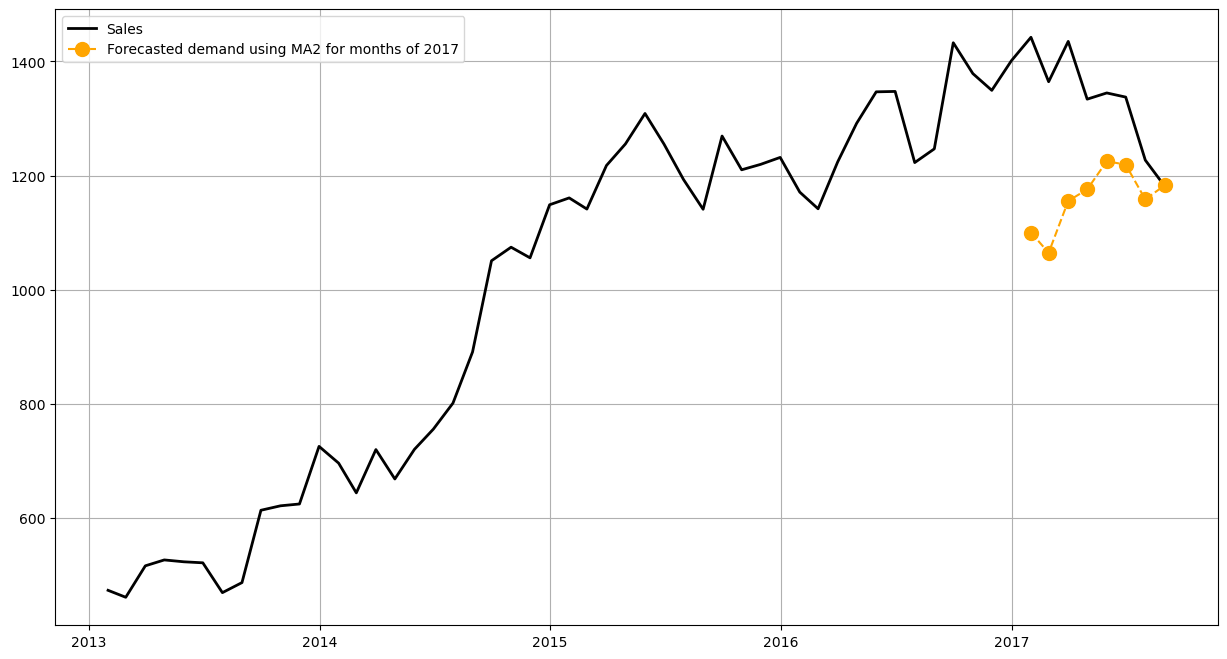

In [63]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(df_monthly['sales'],label='Sales', color='black',linewidth=2)
plt.plot(MA2_forecasted_sales["Forecasted sales for Months of 2017"],label='Forecasted demand using MA2 for months of 2017',marker='o', markersize=10, linestyle='dashed', color='orange')
plt.legend(loc=2)
plt.show()

In [64]:
MAD_MA2 = np.mean(np.absolute(MA2_forecasted_sales["Forecasted sales for Months of 2017"].values - df_monthly['sales'][-8:].values))
MAD_MA2

173.44980440495922

# Exponential Smoothing 

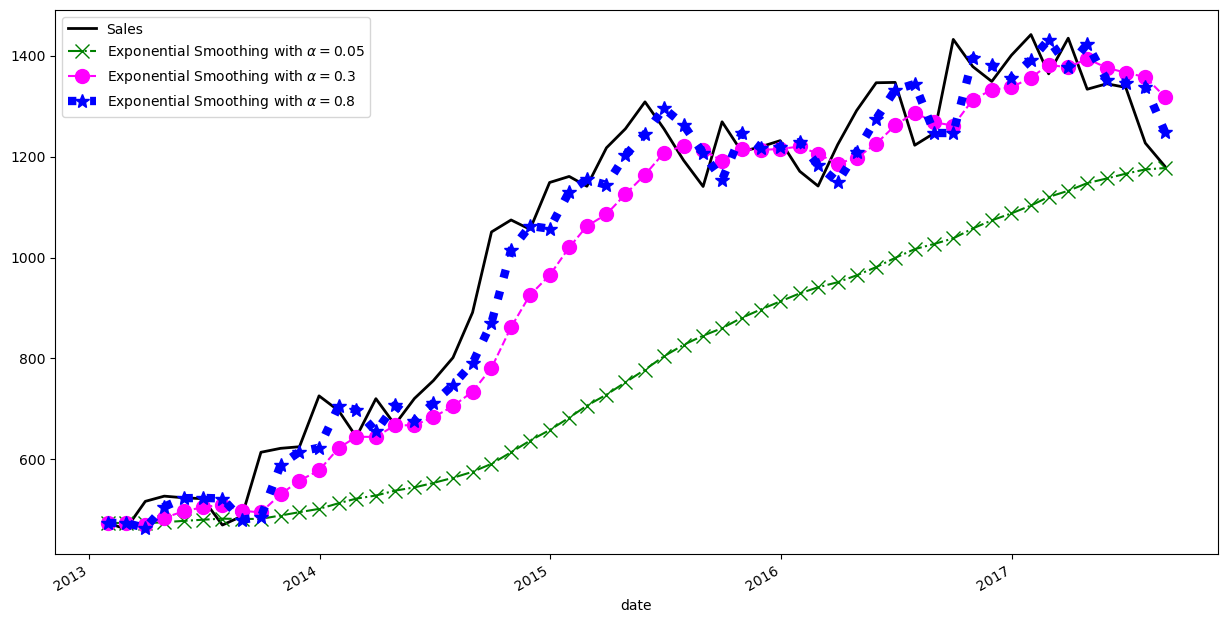

In [66]:
plt.figure(figsize=(15,8))
plt.grid(True)

plt.plot(df_monthly.iloc[0:],label='Sales', color='black',linewidth=2)


from statsmodels.tsa.api import  SimpleExpSmoothing

ES1 = SimpleExpSmoothing(df_monthly).fit(smoothing_level=0.05,optimized=False)

ES1.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=%s$'%0.05, marker='x', markersize=10, linestyle='dashdot', color='green')


ES2 = SimpleExpSmoothing(df_monthly).fit(smoothing_level=0.3,optimized=False)

ES2.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=%s$'%0.3, marker='o', markersize=10, linestyle='dashed', color='magenta')


ES3 = SimpleExpSmoothing(df_monthly).fit(smoothing_level=0.8,optimized=False)

ES3.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=%s$'%0.8, marker='*', markersize=10, linestyle='dotted', color='blue',linewidth=6)


plt.legend(loc=2)

plt.show()

**Important remark:** Before we choose the best smoothing constant, we first need to address the seasonality! Generally speaking, it is a bad idea to apply the exponential smoothing technique on data that has seasonality. 

## Train the ES model

### How to address seasonality in (simple) ES?

Similar to the MA technique, the simple ES method presented above, cannot directly address seasonality. As such, we can only apply it on the deseasonalized data.

Here is the approach: **First, we deasonalize the data. Then, apply the ES method and calculate the forecast. Then, we seasonalize the forecast**. 

In [69]:
deseason_data_exp = train_sales_data.copy()
deseason_data_exp

,deseason_sales
date,
2013-01-31,529.300063
2013-02-28,532.852852
2013-03-31,549.550210
2013-04-30,550.914566
2013-05-31,525.449403
2013-06-30,526.232642
2013-07-31,498.429496
2013-08-31,506.246867
2013-09-30,550.117888


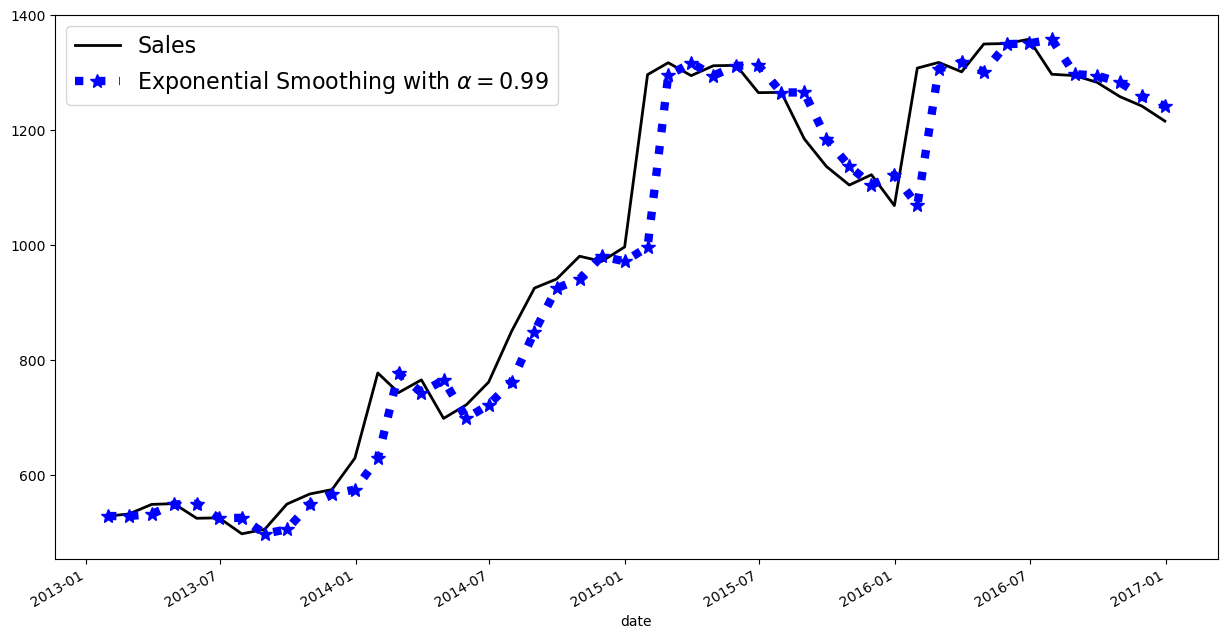

In [112]:
plt.figure(figsize=(15,8))
plt.grid(True)

from statsmodels.tsa.api import  SimpleExpSmoothing

plt.plot(deseason_data_exp,label='Sales', color='black',linewidth=2)


ES_best = SimpleExpSmoothing(deseason_data_exp).fit() # by default, python will find the best alpha!
best_alpha = ES_best.model.params['smoothing_level']

ES_best.fittedvalues.plot(label=r'Exponential Smoothing with $\alpha=${:0.2f}'.format(best_alpha), 
                          marker='*', markersize=10, linestyle='dotted', color='blue',linewidth=6)

plt.legend(loc=2,prop={'size': 16})


plt.show()

## Test the ES model

Next, we test this model for the 8 months of 2017.

#### Important remark 1: 

**Simple ES method** gives a flat forecast, meaning that it provides one value for the (deseasonalized) forecast of every month in the future. Here we use the forecast() method of SimpleExpSmoothing. 

#### Important remark 2: Deseasonalizaiton step 

At the end, after forecasting the deseasonalized demand, we need to calculate the seasonalized (actual) forecasts. This is an important step!

$$ \textbf{Seasonal Forecast} = \text{Deseasonalized forecast from simple ES model}\ \times \  \text{seasonal index}$$

In [72]:
ES_forecasted_sales = df_monthly.iloc[-8:]
ES_forecasted_sales.rename(columns={"sales": "Forecasted sales for 2017"}, inplace=True)


ES_forecasted_deseason_sales = ES_best.forecast()

b = ES_forecasted_deseason_sales.values[0]*sales_table["S Index"][0:8]
ES_forecasted_sales["Forecasted sales for 2017"] = list(b)

ES_forecasted_sales

,Forecasted sales for 2017
date,
2017-01-31,1088.610678
2017-02-28,1053.508502
2017-03-31,1143.381918
2017-04-30,1163.330073
2017-05-31,1212.160855
2017-06-30,1206.237050
2017-07-31,1146.066774
2017-08-31,1170.676712


Let's see the graph and check how ES_best performs on 2017's dataset! Note that none of the data points of 2017 was used in the ES_best model!

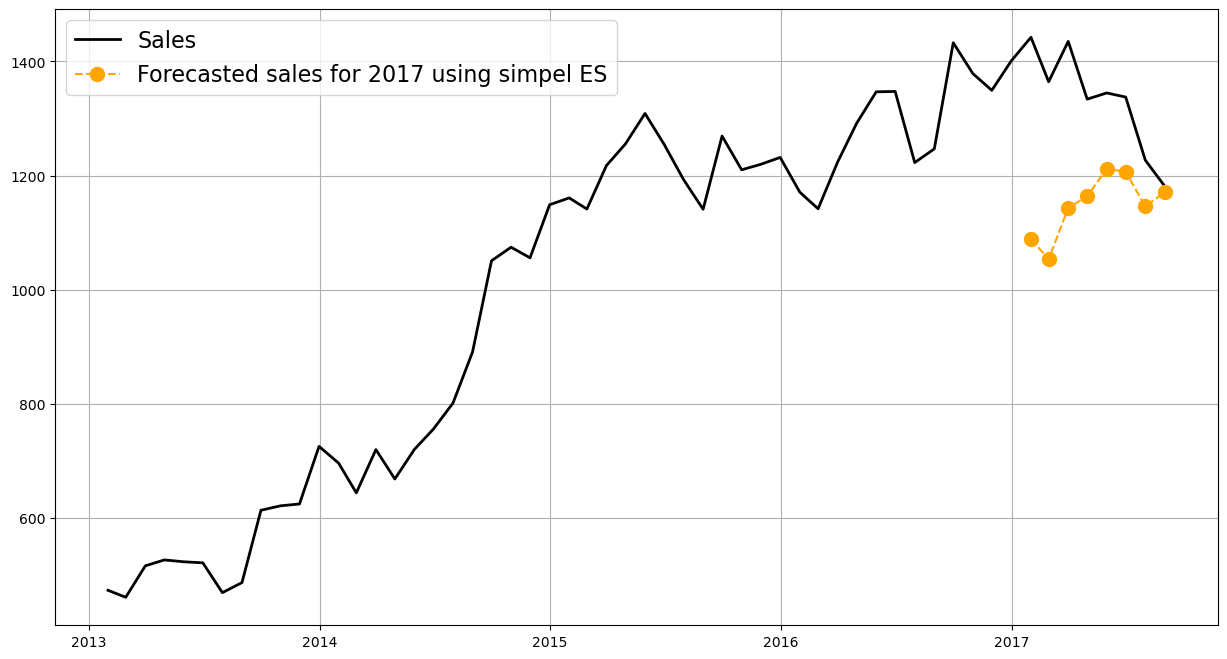

In [74]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(df_monthly['sales'],label='Sales', color='black',linewidth=2)
plt.plot(ES_forecasted_sales["Forecasted sales for 2017"],label='Forecasted sales for 2017 using simpel ES',marker='o', markersize=10, linestyle='dashed', color='orange')
plt.legend(loc=2,prop={'size': 16})
plt.show()

**Scoring**: Next, let's calculate the MAD score of the simple ES model:

In [76]:
MAD_ES = np.mean(np.absolute(ES_forecasted_sales["Forecasted sales for 2017"].values - df_monthly['sales'][-8:].values))
round(MAD_ES,2)

185.07

## Holt-Winters Exponential Smoothing (HWES) method

This is a revised and sofistichated variant of simple ES. The main advantage is that it works on seasonal data. So, **there is no need to deasonalize the data in this mehtod**.

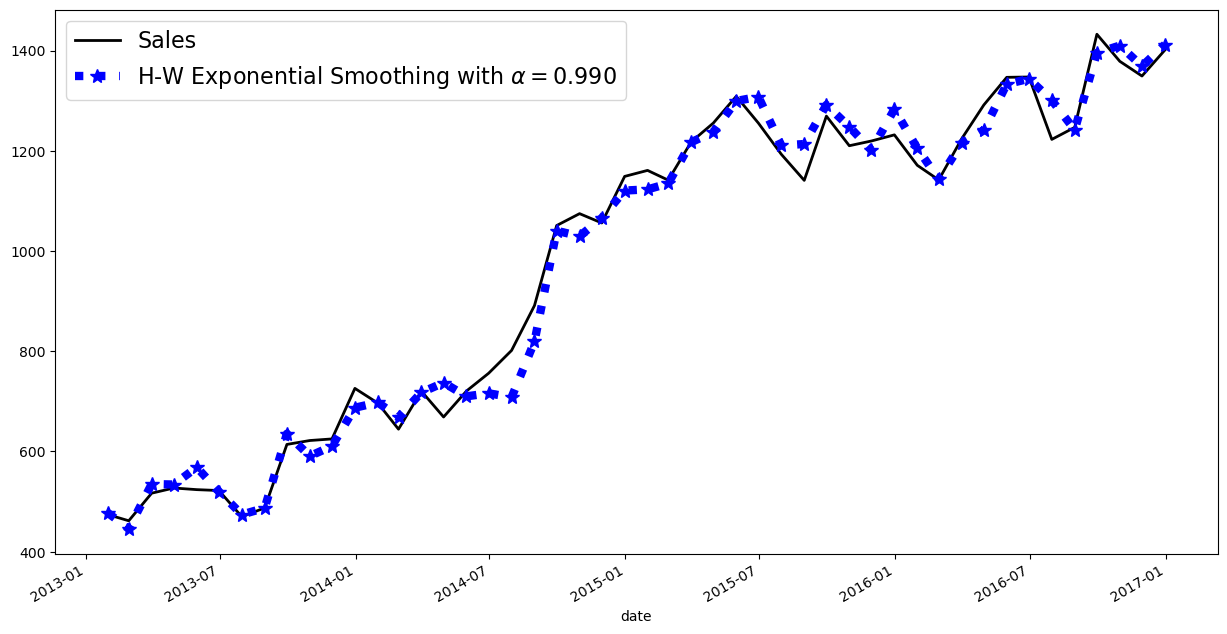

In [78]:
plt.figure(figsize=(15,8))
plt.grid(True)

df_train = df_monthly.iloc[0:48]
plt.plot(df_train ,label='Sales', color='black',linewidth=2)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

H_W_model = ExponentialSmoothing(df_train.astype(float), trend="add", seasonal="add", seasonal_periods=12)

H_W_fit = H_W_model.fit()

best_H_W_alpha = H_W_fit.model.params['smoothing_level']

H_W_fit.fittedvalues.plot(label=r'H-W Exponential Smoothing with $\alpha=%0.3f$'%best_H_W_alpha,
                          marker='*', markersize=10, linestyle='dotted', color='blue',linewidth=6)
plt.legend(loc=2,prop={'size': 16})


plt.show()

## Test the HWES model

Here, we test the Holt Winters ES model on the data of 2017:

In [80]:
HES_forecasted_sales = df_monthly.iloc[48:]
HES_forecasted_sales.rename(columns={"sales": "Forecasted sales in 2017"}, inplace=True)

HES_forecasted_sales["Forecasted sales in 2017"] = H_W_fit.forecast(9)

HES_forecasted_sales

,Forecasted sales in 2017
date,
2017-01-31,1373.162139
2017-02-28,1344.741887
2017-03-31,1417.832832
2017-04-30,1434.800148
2017-05-31,1476.049096
2017-06-30,1472.200167
2017-07-31,1424.628446
2017-08-31,1442.613581


Let's see the graph and check how H_W_ES performs on 2017's dataset! Note that none of the data points of 2019 was used in training this model!

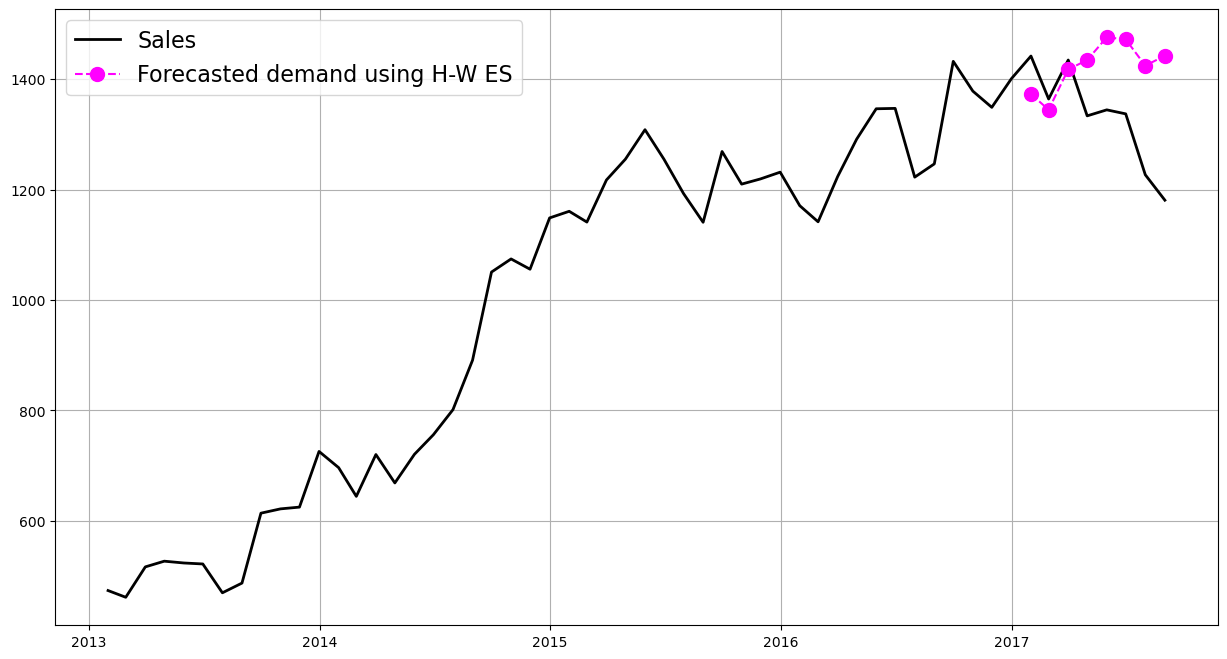

In [82]:
plt.figure(figsize=(15,8))
plt.grid(True)

plt.plot(df_monthly['sales'], label='Sales', color='black',linewidth=2)
plt.plot(HES_forecasted_sales["Forecasted sales in 2017"],label='Forecasted demand using H-W ES',
         marker='o', markersize=10, linestyle='dashed', color='magenta')
plt.legend(loc=2,prop={'size': 16})
plt.show()

**Scoring**: Next, let's calculate the MAD score of the Holt Winters ES model:

In [84]:
MAD_HES = np.mean(np.absolute(HES_forecasted_sales["Forecasted sales in 2017"].values - df_monthly['sales'][-8:].values))
round(MAD_HES,2)

116.53

## Forecasting the future demand using the best model

**Important remark 1**: Note that now that we chose the best model, we should use all the past data including 2017!

Let's forecast for the next four months of 2017. 

**Important remark 2**: Unlike MA and simple ES, the forecast obtained by the Holt Winters ES method are not flat. Also, note that we should not do any deasonalization when using Holt Winters method. 
**Checking the MAD score , MA with winodw size 2  is the best model**

In [87]:
train_final = df_monthly.iloc[0:]
train_final.tail()
#we are considering all the months of 2017 and predicting for the next 4 months

,sales
date,
2017-04-30,1333.692967
2017-05-31,1344.572065
2017-06-30,1337.308537
2017-07-31,1226.952195
2017-08-31,1180.900527


In [109]:
# Calculate the moving average (window size 2) for deseasonalized sales
MA2_forecasted_deseason_sales = train_sales_data["deseason_sales"][-2:].mean()

# Select the last 8 months of the dataframe, assuming you want to forecast for these
MA2_forecasted_sales = df_monthly.iloc[-8:]

# Rename the sales column for forecasted months
MA2_forecasted_sales.rename(columns={"sales": "Forecasted sales for Months of 2017"}, inplace=True)

# Calculate forecasted sales for the next 4 months by reintroducing seasonality
a = MA2_forecasted_deseason_sales * sales_table["S Index"][:8] 

# Update forecasted sales with seasonally adjusted values for each month
MA2_forecasted_sales["Forecasted sales for Months of 2017"] = list(a)

# Print the forecasted sales
print(MA2_forecasted_sales[["Forecasted sales for Months of 2017"]])

#Lets calculate mean of forecasted sales to check with original data 

print("The mean sales for 8 months Jan-Aug from forecasted model is {}".format(MA2_forecasted_sales["Forecasted sales for Months of 2017"].mean()))

            Forecasted sales for Months of 2017
date                                           
2017-01-31                          1100.150623
2017-02-28                          1064.676342
2017-03-31                          1155.502472
2017-04-30                          1175.662090
2017-05-31                          1225.010508
2017-06-30                          1219.023907
2017-07-31                          1158.215789
2017-08-31                          1183.086608
The mean sales for 8 months Jan-Aug from forecasted model is 1160.1660423720616


In [115]:
#Lets see our initial data for 8 months of 2017 so as to compare with our forecasted model
print(train_final.tail(8))
print("The mean sales from given data is {}".format (train_final['sales'].tail(8).mean()))

                  sales
date                   
2017-01-31  1442.045126
2017-02-28  1364.218936
2017-03-31  1434.864261
2017-04-30  1333.692967
2017-05-31  1344.572065
2017-06-30  1337.308537
2017-07-31  1226.952195
2017-08-31  1180.900527
The mean sales from given data is 1333.0693264804147


In [93]:
# Step 1: Calculate the moving average for deseasonalized sales using the last 2 months of training data
# This is your trained model output based on the moving average (window size = 2)
MA2_forecasted_deseason_sales = train_sales_data["deseason_sales"][-2:].mean()

# Step 2: Create a new DataFrame to store forecasts for September to December 2017
forecasted_sales_2017 = pd.DataFrame(index=["2017-09", "2017-10", "2017-11", "2017-12"])

# Step 3: Calculate forecasted deseasonalized sales for each of these months and reintroduce seasonality
# Using the seasonal indices for the respective months (assuming September = index 8, October = index 9, etc.)
forecasted_sales_2017["Forecasted sales for Sep-Dec 2017"] = MA2_forecasted_deseason_sales * sales_table["S Index"][8:12].values

# Step 4: Print the forecasted sales
print(forecasted_sales_2017)


         Forecasted sales for Sep-Dec 2017
2017-09                        1371.686512
2017-10                        1346.072620
2017-11                        1334.983588
2017-12                        1415.972555


### If we see the closer look of the forecasted sales for year 2017 from the month Sep-Dec , its nearly equivalent to the average of given sales  .